<a href="https://colab.research.google.com/github/wallik2/University-stuff/blob/main/Intro_Data_Sci/Homework/HW10_Feature_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd, numpy as np

### 0) Preprocessing the data

In [ ]:
# Import dataset

Iris_data = pd.read_csv("/content/drive/MyDrive/Data /iris.data",header=None) 

Iris_data.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
Label_Encoder = LabelEncoder()

label_data = Label_Encoder.fit_transform(Iris_data[4])

Iris_data[4] = label_data

In [ ]:
Iris_data

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
Label_Encoder.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)



---



### 1. Low Variance Feature Selection

In [ ]:
from sklearn.feature_selection import VarianceThreshold

In [ ]:
Threshold = float(input("Enter the value of threshold : "))

var_th = VarianceThreshold(threshold=Threshold)
var_th.fit_transform(Iris_data)



print("The variance :", var_th.variances_)
Iris_1_transformed = Iris_data.loc[:, var_th.get_support()]

Enter the value of threshold : 0.1
The variance : [0.68112222 0.18675067 3.09242489 0.57853156 0.66666667]


In [ ]:
Iris_1_transformed

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2




---



### 2. Univariate Feature Selection

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

In [ ]:
X = Iris_data.iloc[:,0:4]

y = Iris_data.iloc[:,4]

In [ ]:
K = int(input("Enter K : "))

sel_K = SelectKBest(chi2, k=K)

sel_K.fit_transform(X, y)

Iris_2_transformed = X.loc[:, sel_K.get_support()]


#Iris_2_transformed = pd.DataFrame(sel_K.fit_transform(X, y))

Enter K : 1


In [ ]:
Iris_2_transformed

,2
0,1.4
1,1.4
2,1.3
3,1.5
4,1.4
...,...
145,5.2
146,5.0
147,5.2
148,5.4


In [ ]:
print(sel_K.scores_)

[ 10.81782088   3.59449902 116.16984746  67.24482759]




---



### 3. Recursive Feature Elimination

In [ ]:
from sklearn.feature_selection import RFE  
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

#### 3.1. Logistic Regression

In [ ]:
model = LogisticRegression()

rfe = RFE(model)   #default = 4features/2 = 2 features
rfe.fit_transform(X, y)

Iris_3_transformed = X.loc[:, rfe.get_support()]

In [ ]:
Iris_3_transformed

,2,3
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [ ]:
# Fit and evaluate the model

model.fit(X,y)

y_pred = model.predict(X)

In [ ]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
# Evaluation metric : F1 score

from sklearn.metrics import f1_score

accuracy = f1_score(y.to_numpy(), y_pred,average='micro')

print('The Accuracy of Logistic Regression is ',accuracy)

The Accuracy of Logistic Regression is  0.9733333333333334


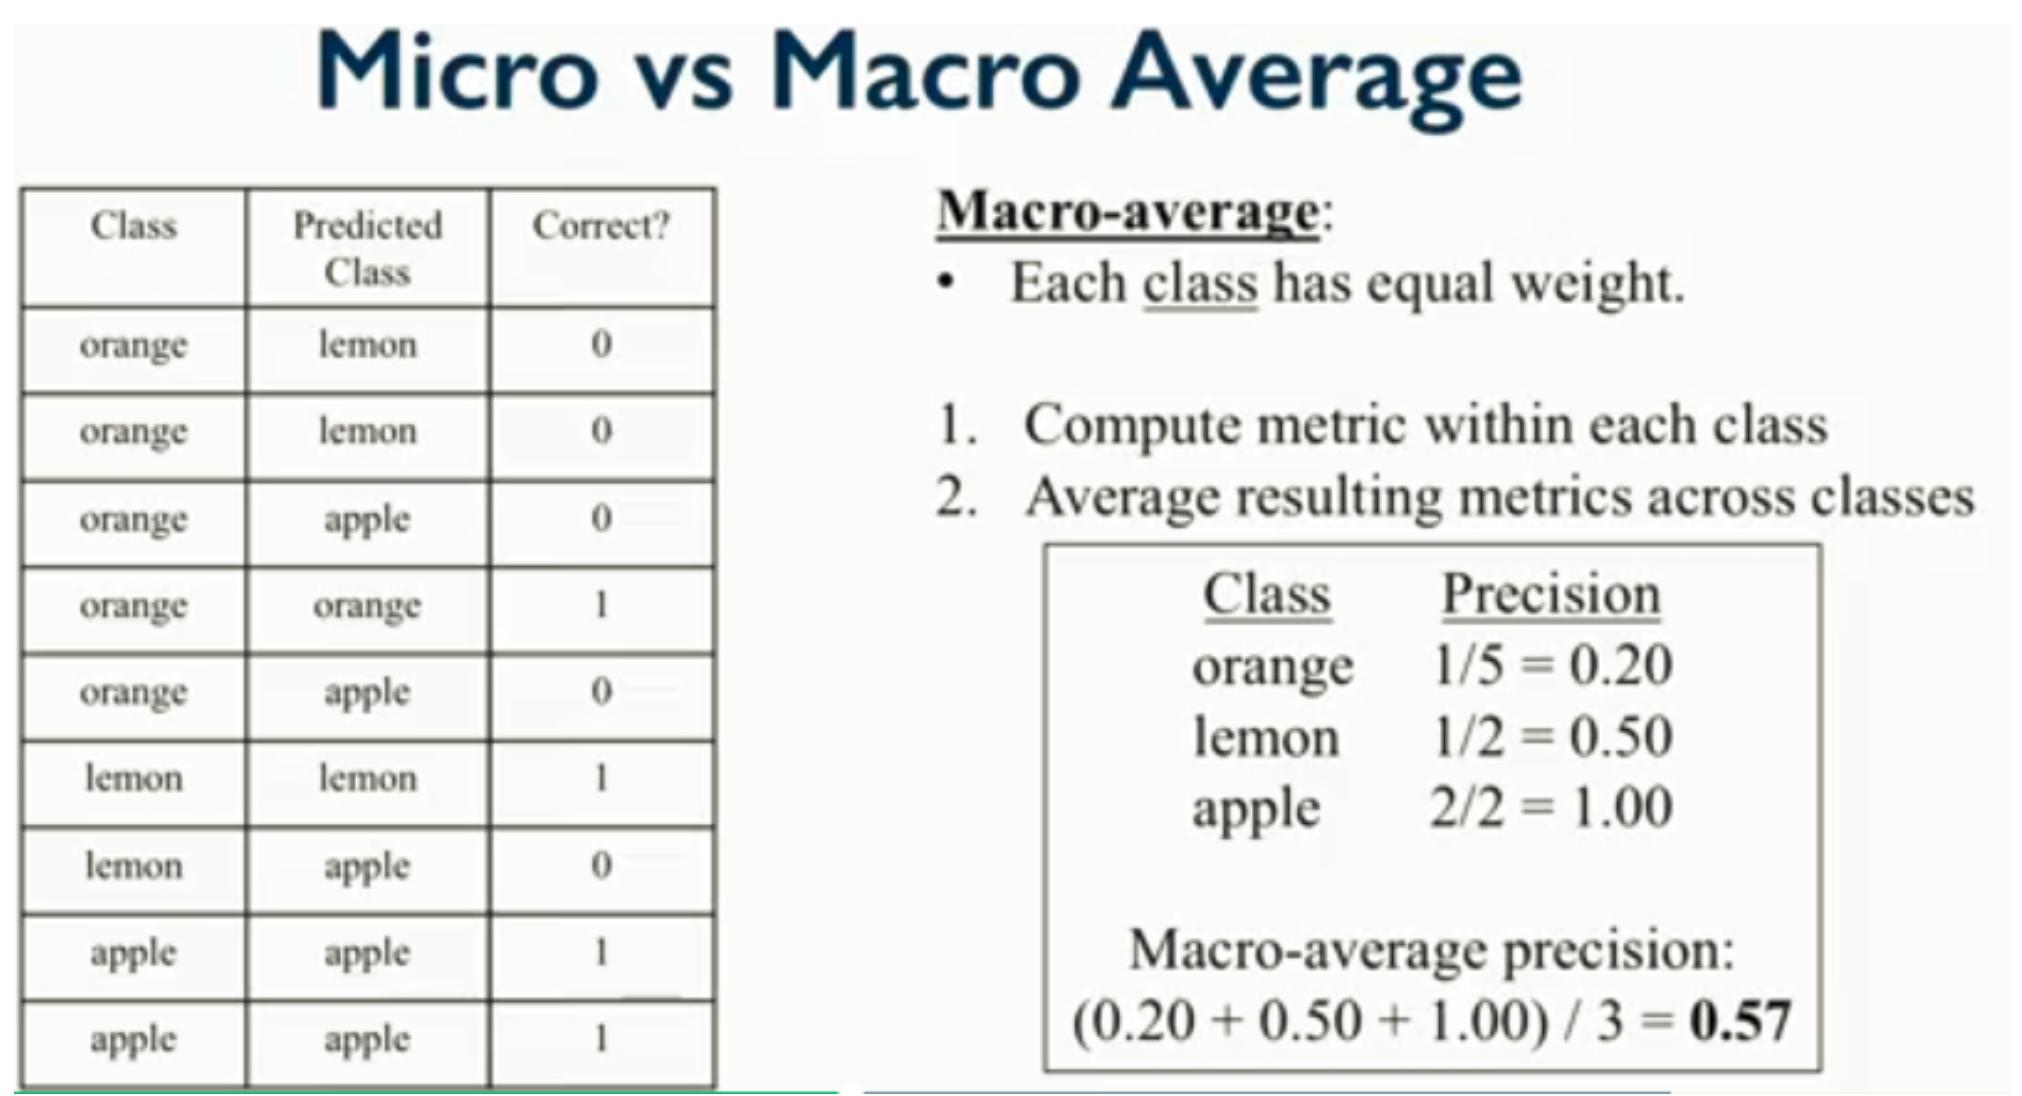

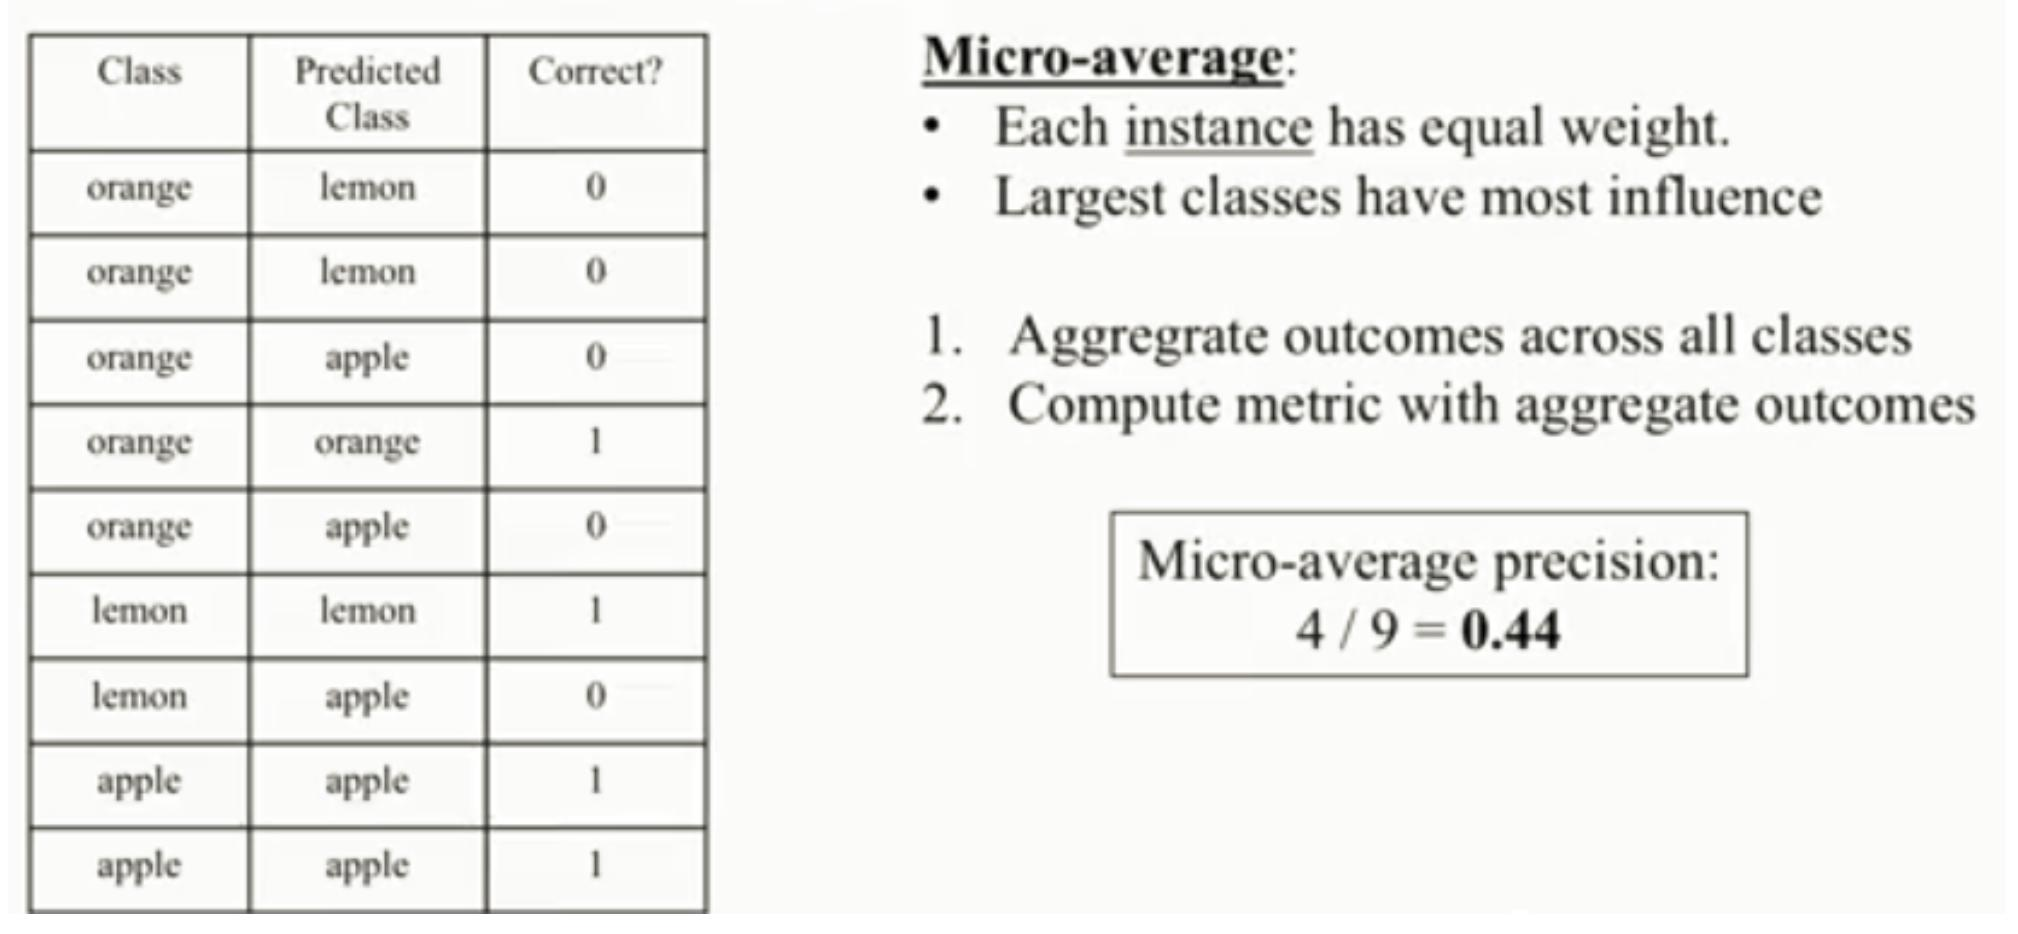

#### 3.2. Decision Tree classifier

In [ ]:
model = DecisionTreeClassifier()

rfe = RFE(model)   #default = 4features/2 = 2 features
rfe.fit_transform(X, y)

Iris_3_transformed = X.loc[:, rfe.get_support()]


In [ ]:
Iris_3_transformed

,2,3
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [ ]:
# Fit and evaluate the model

model.fit(X,y)

y_pred = model.predict(X)

In [ ]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
accuracy = f1_score(y.to_numpy(), y_pred,average='micro')

print('The Accuracy of DecisionTreeClassifier is ',accuracy)

The Accuracy of DecisionTreeClassifier is  1.0




---



### 4. PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=3)

In [ ]:
Iris_4_transformed = pd.DataFrame(pca.fit_transform(X))

In [ ]:
Iris_4_transformed

,0,1,2
0,-2.684207,0.326607,-0.021512
1,-2.715391,-0.169557,-0.203521
2,-2.889820,-0.137346,0.024709
3,-2.746437,-0.311124,0.037672
4,-2.728593,0.333925,0.096230
...,...,...,...
145,1.944017,0.187415,0.179303
146,1.525664,-0.375021,-0.120636
147,1.764046,0.078519,0.130784
148,1.901629,0.115877,0.722874
